### Install Required Packages

In [1]:

! pip install numpy pandas sklearn seaborn

### Imports

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

### Dataset import and exploration

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

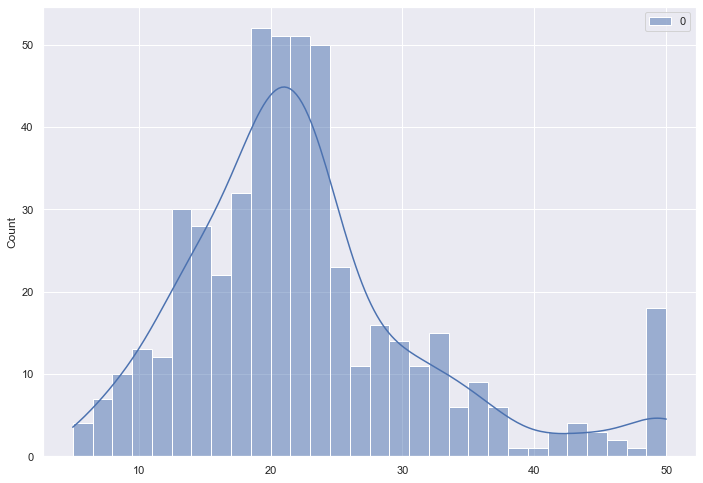

In [3]:
boston_dataset = load_boston()
boston_X_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_y_df = pd.DataFrame(boston_dataset.target)
print(boston_X_df)
print(boston_y_df)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(boston_y_df, bins=30, kde=True)
plt.show()

### Model definition

In [4]:
class MultipleLinearRegression:

    def __init__(self):
        self.coefs_ = None

    def fit(self, X: pd.DataFrame, y: pd.DataFrame):
        """
        Fits the Linear Regression model
        :param X: dataframe contains the observations
        :param y: dataframe contains the target values
        """
        X = X.to_numpy()
        y = y.to_numpy()

        n = X.shape[0]
        print(f'Number of observations {n}')

        # Append an extra column with ones to X
        ones_array = np.ones((n,1))
        X = np.hstack((ones_array, X))

        # Calculate (X'X)
        X_transpose = np.transpose(X)
        X_transpose_X = np.dot(X_transpose, X)

        # Calculate the b = (X^T X)^-1 X^T Y
        inv_X_transponse_X = np.linalg.inv(X_transpose_X)
        self.coefs_ = np.dot(np.dot(inv_X_transponse_X, X_transpose), y)

    def predict(self, X: pd.DataFrame):
        """
        Predicts the values of the given data
        :param X: dataframe contains the observations to predict
        :return The predicted value
        """
        X = X.to_numpy()
        n = X.shape[0]

        # Append an extra column with ones to X
        ones_array = np.ones((n,1))
        X = np.hstack((ones_array, X))
        return np.dot(X, self.coefs_)

## Helper functions

In [5]:
def rss(y_true, y_pred):
    """
    Calculates the Residual Sum of Squares
    :param y_true: The true values
    :param y_pred: The predicted values
    :return: RSS
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum((y_true - y_pred) ** 2, dtype=np.float64)

def print_stats(y_true, y_pred):
    rss_ = rss(y_true, y_pred)
    rse = math.sqrt(rss_/(y_true.shape[0]-2))
    r2 = r2_score(y_true, y_pred)
    print(f'rss: {rss_}\nrse: {rse}\nr2 score: {r2}\n')

### Split & train the model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(boston_X_df, boston_y_df, test_size=0.1, random_state=42)

model = MultipleLinearRegression()
model.fit(X_train, y_train)

print(f'Bias:\n{model.coefs_[0]}\n')
print(f'Coefficients:\n{model.coefs_[1:]}\n')

y_test_pred = model.predict(X_test)
print('=== Stats for y_test ===')
print_stats(y_test, y_test_pred)

y_train_pred = model.predict(X_train)
print('=== Stats for y_train ===')
print_stats(y_train, y_train_pred)


Number of observations 455
Bias:
[36.73146277]

Coefficients:
[[-1.19886262e-01]
 [ 3.99134691e-02]
 [ 2.12938504e-02]
 [ 2.77565167e+00]
 [-1.85854960e+01]
 [ 3.75579160e+00]
 [ 4.57076424e-03]
 [-1.47064595e+00]
 [ 3.11878023e-01]
 [-1.18109903e-02]
 [-9.47556337e-01]
 [ 1.03287982e-02]
 [-5.50096256e-01]]

=== Stats for y_test ===


ValueError: the 'dtype' parameter is not supported in the pandas implementation of sum()

### Compare with sklearn's LinearRegression

In [ ]:
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)

print(f'Bias:\n{sk_model.intercept_}\n')
print(f'Coefficients:\n{sk_model.coef_}\n')

y_test_pred = model.predict(X_test)
print('=== Stats for y_test ===')
print_stats(y_test, y_test_pred)